# Pima Indians Diabetes - Binary Classification

>목표 : 환자가 당뇨병(diabetes)인지 아닌지를 정확하게 예측할 수 있는 모델 만들기  

데이터셋은 여러 개의 `의료 관련 예측 변수(predictor variables)`와 하나의 목표 변수(target variable)인 `Outcome`으로 구성

예측 변수에는 환자가 임신한 횟수(Pregnancies), 체질량지수(BMI), 인슐린 수치(Insulin), 나이(Age) 등이 포함

### Dataset Description (변수 설명)

`Pregnancies`: 지금까지 임신한 횟수

`Glucose`: 경구 포도당 내성 검사(OGTT) 중 2시간 동안 측정된 혈장 포도당 농도

`BloodPressure`: 이완기 혈압 (단위: mm Hg)

`SkinThickness`: 상완 삼두근 피부두께 (단위: mm) — 체지방률을 간접적으로 측정

`Insulin`: 2시간 혈청 인슐린 수치 (단위: mu U/ml)

`BMI`: 체질량지수 (공식: 체중(kg) / 키(m)^2) — 비만도를 나타냄

`Pedigree`: Diabetes Pedigree Function — 가족력 기반으로 당뇨병 가능성을 수치화한 값

`Age`: 나이 (단위: 세)

`Outcome`: 클래스 변수 (0이면 당뇨병이 아님, 1이면 당뇨병임)

### Data Load

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("data/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df.shape

(768, 9)

### Data Processing

In [70]:
# data 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


`Pregnancies` 값은 현실적인 범위인 0에서 17 사이로 나타남

`DiabetesPedigreeFunction`은 가족력을 바탕으로 당뇨병 발생 가능성을 점수화한 함수로, 값의 범위는 0.08에서 2.42

`Age` 변수는 21세부터 81세까지의 값을 가짐

`Outcome`은 목표 변수(target variable)로 값이 0이면 건강한 사람(당뇨병이 아님),1이면 당뇨병이 있는 사람을 의미!

그런데 `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`와 같은 변수들에는 실제로는 존재할 수 없는 값인 0이 포함되어 있음
이러한 비현실적인 값(0)은 전처리 단계에서 수정할 예정 → mean / meadian 값으로 대체

여기서는 `median`을 사용!

In [72]:
df.isnull().sum().sum()

0

In [73]:
df.duplicated().sum()

0

다행히 중복된 데이터는 0개로 존재하지 않음!

#### median으로 대체할 비현실적인 값들은 모두 확인

In [74]:
# 데이터셋에서 0 값이 있는지 확인 (아까 봤던 column들을 5개만 보기)
print("Blood Pressure column에서 0인 값들의 수  : ", df[df['BloodPressure']==0].shape[0])
print("Glucose column에서 0인 값들의 수         : ", df[df['Glucose']==0].shape[0])
print("Skin Thickness column에서 0인 값들의 수  : ", df[df['SkinThickness']==0].shape[0])
print("Insulin column에서 0인 값들의 수         : ", df[df['Insulin']==0].shape[0])
print("BMI column에서 0인 값들의 수             : ", df[df['BMI']==0].shape[0])

Blood Pressure column에서 0인 값들의 수  :  35
Glucose column에서 0인 값들의 수         :  5
Skin Thickness column에서 0인 값들의 수  :  227
Insulin column에서 0인 값들의 수         :  374
BMI column에서 0인 값들의 수             :  11


### EDA

Outlier 찾기

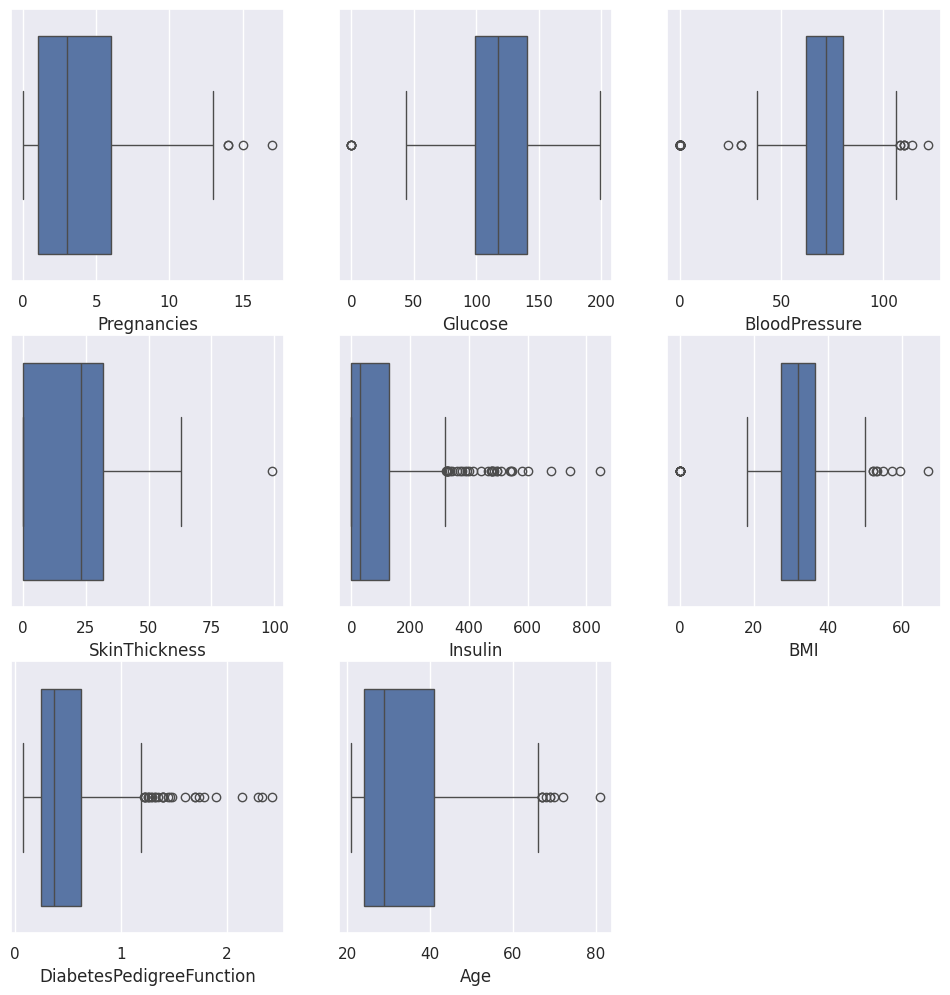

In [75]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = df)
plt.show()

#### Visualization of Target Variable

array([<Axes: title={'center': 'Pie Chart'}, ylabel='count'>],
      dtype=object)

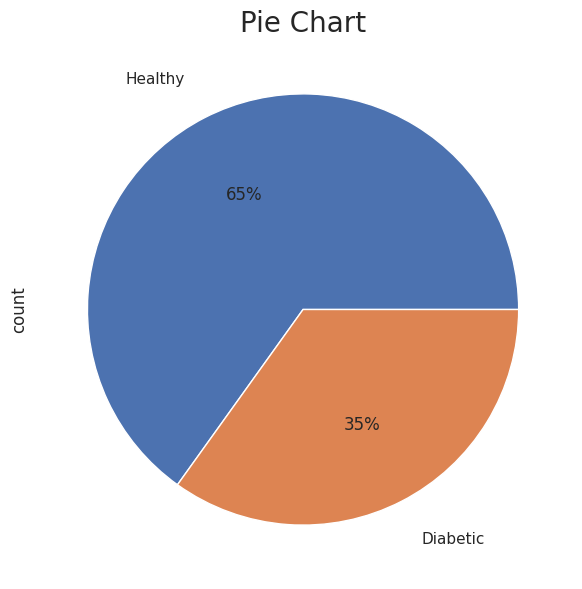

In [76]:
sns.set_theme(style="darkgrid")
labels = ["Healthy", "Diabetic"]
plt.figure(figsize=(10,7))
plt.title('Pie Chart', fontsize=20)
df['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

당뇨병 환자의 수:  268
건강한 사람의 수:  500


/tmp/ipykernel_3631427/574373930.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Healthy", "Diabetic"])


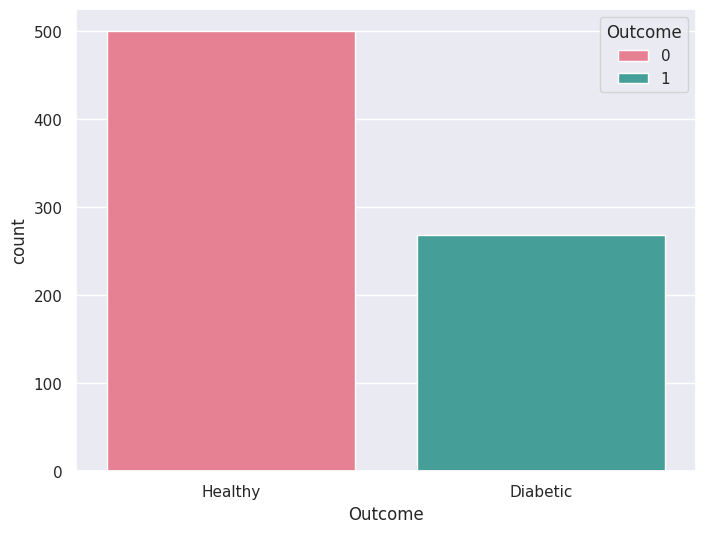

In [77]:
from matplotlib.pyplot import figure, show
figure(figsize=(8,6))
ax = sns.countplot(x=df['Outcome'], data=df,palette="husl", hue="Outcome")
ax.set_xticklabels(["Healthy", "Diabetic"])
healthy, diabetics = df['Outcome'].value_counts().values
print("당뇨병 환자의 수: ", diabetics)
print("건강한 사람의 수: ", healthy)

약 13대 7 비율로 정상인과 당뇨병으로 구성 → Class imbalance 한 것을 확인 가능함!

#### 각 변수에 따라서 당뇨병 결과 확인

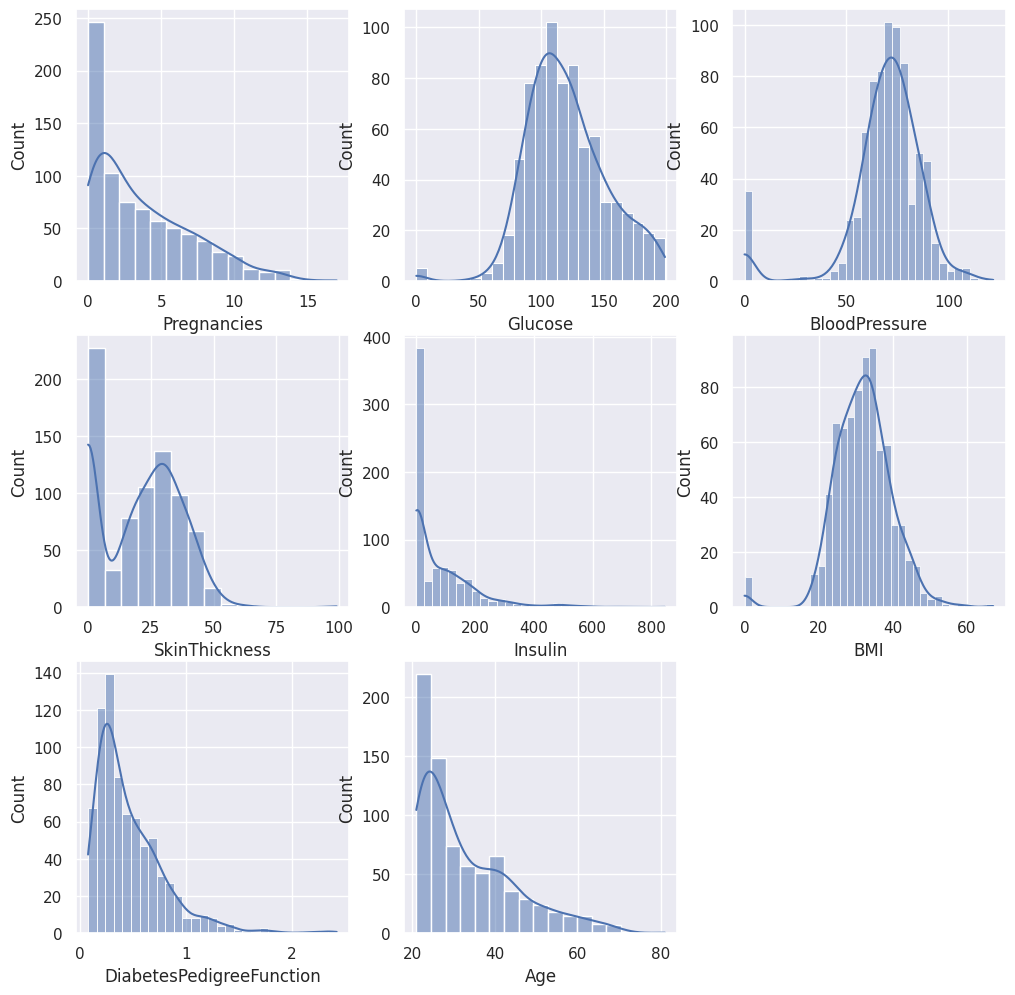

In [78]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = df, kde = True)
plt.show()

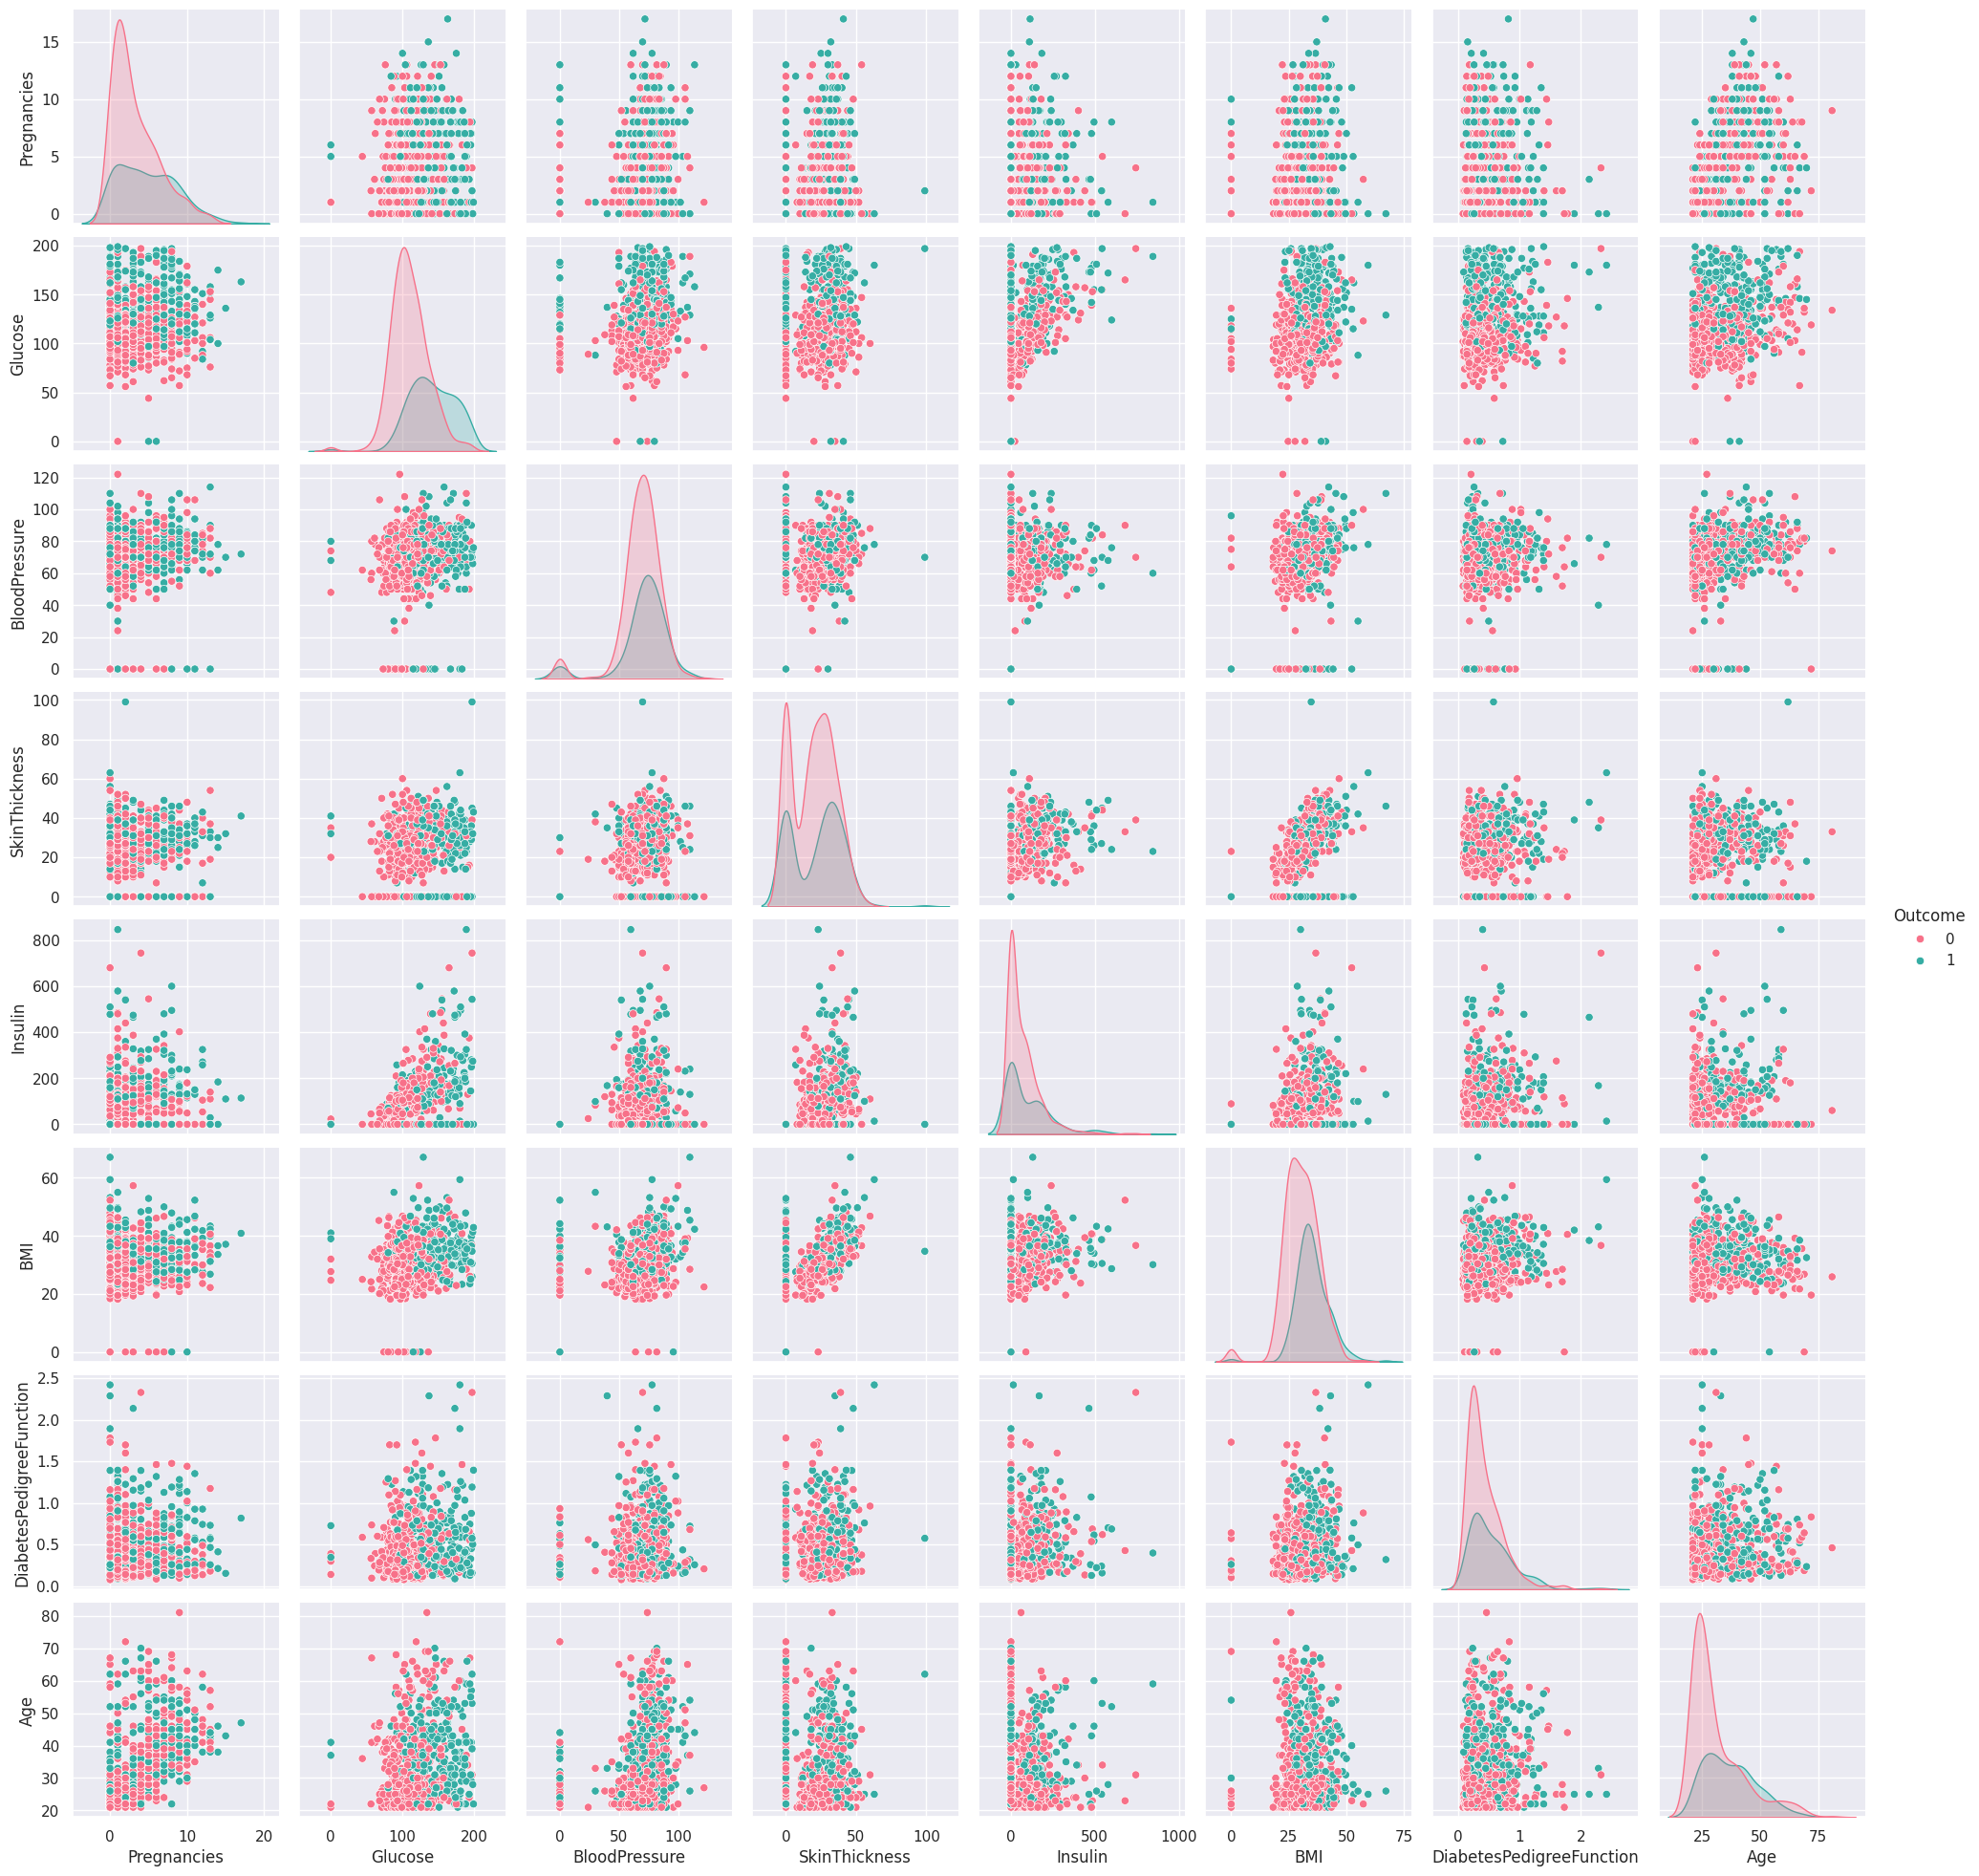

In [79]:
sns.pairplot(df, hue="Outcome", palette="husl")

#### Correlation Matrix using Heat map
변수 간 상관관계를 시각적으로 확인하기 위한 Heatmap

>Pearson's Correlation Coefficient는 두 변수 간의 선형 관계를 -1~+1 사이 값  
>
>1에 가까울수록 강한 양의 상관관계, 0은 무관, -1은 강한 음의 상관관계를 의미

Text(0.5, 1.0, 'Heat Map')

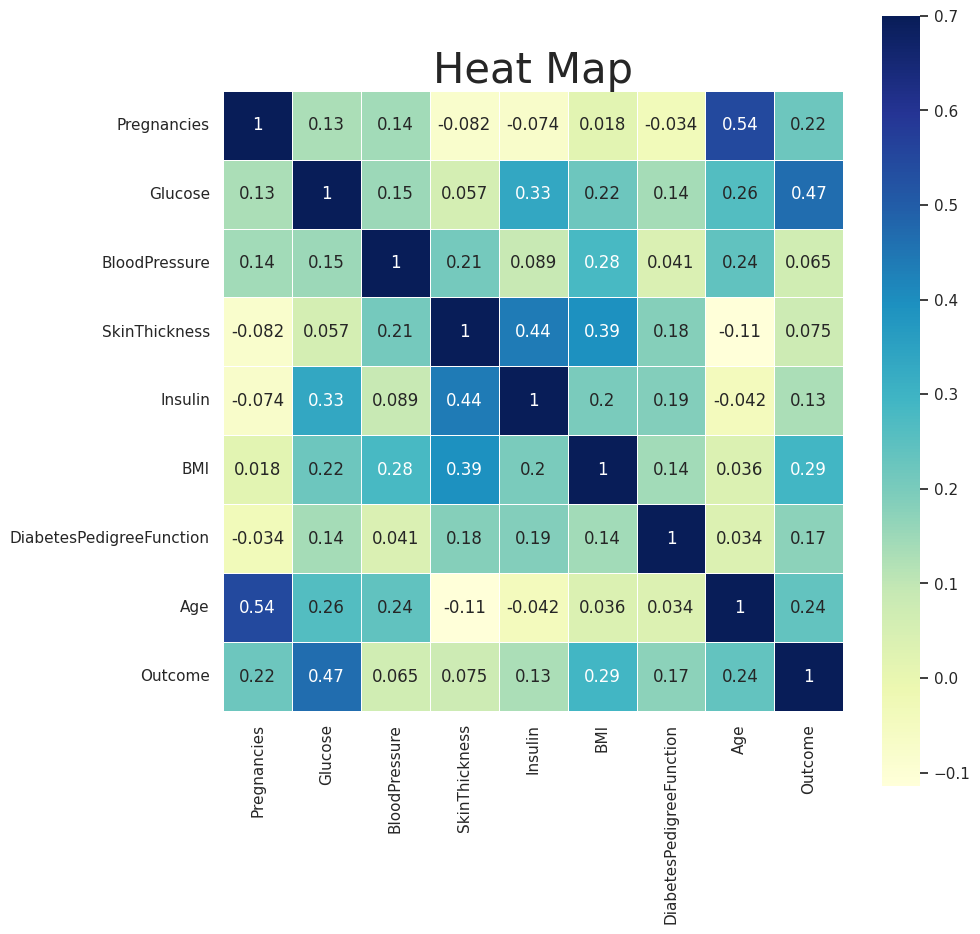

In [80]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, vmax=.7, square=True, cmap="YlGnBu",annot=True,linewidths=.5); #.set_title('Heat Map',fontsize=20);
plt.title('Heat Map', fontsize=30)

Outcome 행의 상관계수를 살펴보면, `Glucose`, `BMI`, `Age`가 가장 높은 상관계수를 가짐

`BloodPressure`, `SkinThickness는` 상관관계가 낮아 예측에 큰 기여를 하지 않으므로 제외 가능함!

→ `Glucose`는 당뇨병 예측에 있어 가장 중요한 지표로 보임

#### Handling Outliers 및 Feature Scaling

In [81]:
# Feature Scaling
from sklearn.preprocessing import QuantileTransformer
quantile  = QuantileTransformer()
dfpima=df.drop('Outcome',axis='columns')
# median과 IQR 값 계산
quantile.fit(dfpima)
dfq = quantile.transform(dfpima)
df_scaled=pd.DataFrame(dfq)
df_scaled.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_scaled.head()

/home/icl/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258


각 feature를 균등 분포 또는 정규 분포를 따르도록 변환  
* Tip) `QuantileTransformer`는  빈도가 높은 값은 넓게 퍼지게 하고, 극단적인 이상치의 영향은 줄이는 데 효과적임

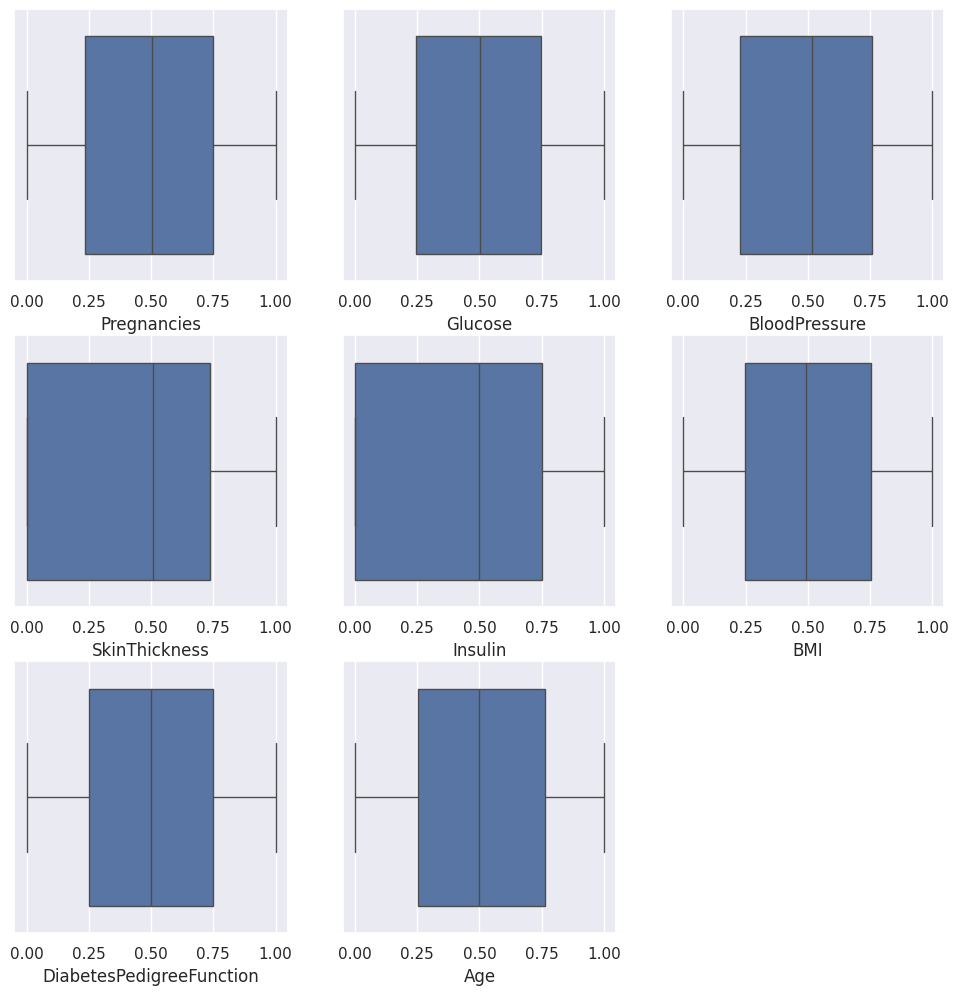

In [82]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = df_scaled)
plt.show()

결과 확인 시 outlier가 존재하는 column 외에는 정규분포를 

#### 중앙값으로 대체

In [83]:
''' x는 feature, y는 label '''
x= df.drop(['Outcome'], axis=1) # 정답은 따로 빼기
y= df['Outcome'] # target variable

In [84]:
from sklearn.impute import SimpleImputer
fill=SimpleImputer(missing_values=0,strategy="mean") # median
x=fill.fit_transform(x)

0이라는 비현실적인 값들을 `Median(중앙값)`으로 대체

### TRAIN TEST SPLIT

Train 데이터 (80%): 모델 학습에 사용

Test 데이터 (20%): 성능 평가에 사용

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0) # random_state=42

### Evaluate Metrics

In [86]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

### Model 성능 평가

기본 모델
* `Logistic Regression`, `Decision Tree`

고급 모델  
* `Random Forest`, `XGBoost`, `LightGBM`

딥러닝  
* `DNN (MLP)`에 Dropout 및 Batch Normalization 적용

기본 모델 

`Logistic Regression`, `Decision Tree`

모델 정의

성능 비교

In [87]:
# 딥러닝 MLP 모델 먼저 정의
import torch
import torch.nn as nn
import torch.nn.functional as F

class DiabetesMLP(nn.Module):
    def __init__(self, input_dim):
        super(DiabetesMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            # nn.Dropout(0.3), # dropout도 적용 가능하나 BN을 끄고 쓰는걸 추천! 되긴하는데 잘못쓰면 성능 떨어질 수 있음
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            # nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# 학습
def train_mlp(model, x_train, y_train, epochs=100, lr=1e-3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    X = torch.tensor(x_train, dtype=torch.float32).to(device)
    y = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32).to(device)

    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

# 평가 지표
def evaluate_mlp(model, x_test):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X = torch.tensor(x_test, dtype=torch.float32).to(device)
    with torch.no_grad():
        probs = model(X).cpu().numpy().flatten()
        preds = (probs > 0.5).astype(int)
    return preds, probs


MLP model은 BN 만을 사용!

In [88]:
# 모델 정의하기
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(verbose=-1)
}

/home/icl/anaconda3/envs/ML/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [89]:
# 결과 저장 및 반복 학습 + 평가
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# sklearn 기반 모델들
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    results = pd.concat([
        results,
        pd.DataFrame([{
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba)
        }])
    ], ignore_index=True)

# MLP 추가
mlp_model = DiabetesMLP(input_dim=x_train.shape[1])
train_mlp(mlp_model, x_train, y_train, epochs=100)
mlp_preds, mlp_probs = evaluate_mlp(mlp_model, x_test)

results = pd.concat([
    results,
    pd.DataFrame([{
        "Model": "MLP with BN",
        "Accuracy": accuracy_score(y_test, mlp_preds),
        "Precision": precision_score(y_test, mlp_preds),
        "Recall": recall_score(y_test, mlp_preds),
        "F1-Score": f1_score(y_test, mlp_preds),
        "ROC-AUC": roc_auc_score(y_test, mlp_probs)
    }])
], ignore_index=True)

/tmp/ipykernel_3631427/2380048954.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([


In [90]:
# 최종 성능 비교표 출력
results.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,MLP with BN,0.798701,0.690476,0.617021,0.651685,0.868363
1,Logistic Regression,0.811688,0.736842,0.595745,0.658824,0.866574
2,Random Forest,0.818182,0.711111,0.680851,0.695652,0.860410
3,LightGBM,0.805195,0.666667,0.723404,0.693878,0.842712
4,XGBoost,0.824675,0.708333,0.723404,0.715789,0.829191
5,Decision Tree,0.746753,0.580000,0.617021,0.597938,0.710380


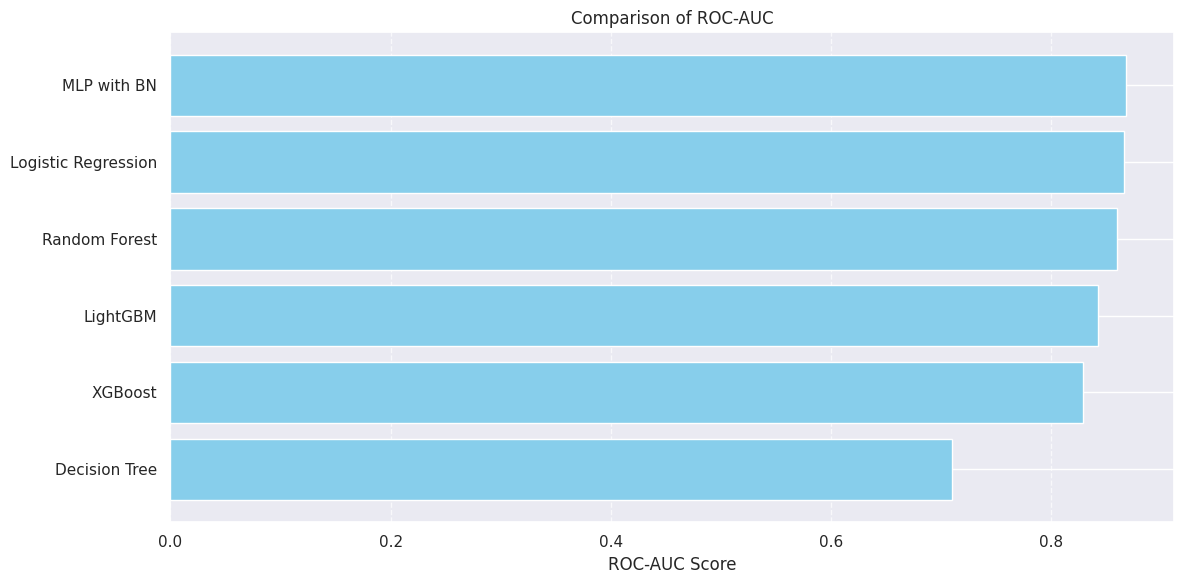

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,MLP with BN,0.798701,0.690476,0.617021,0.651685,0.868363
1,Logistic Regression,0.811688,0.736842,0.595745,0.658824,0.866574
2,Random Forest,0.818182,0.711111,0.680851,0.695652,0.860410
3,LightGBM,0.805195,0.666667,0.723404,0.693878,0.842712
4,XGBoost,0.824675,0.708333,0.723404,0.715789,0.829191
5,Decision Tree,0.746753,0.580000,0.617021,0.597938,0.710380


In [91]:
# ROC-AUC 기준으로 정렬된 결과표 생성
results_sorted = results.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

# 막대그래프로 성능 비교 시각화
plt.figure(figsize=(12, 6))
plt.barh(results_sorted["Model"], results_sorted["ROC-AUC"], color='skyblue')
plt.xlabel("ROC-AUC Score")
plt.title("Comparison of ROC-AUC")
plt.gca().invert_yaxis()  # 가장 높은 값이 위로 오도록
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 결과표 함께 출력
results_sorted


### 불균형 데이터 처리
`SMOTE` (Synthetic Minority Over-sampling Technique)

`가중치 조정` (Class Weight 조정)

#### `SOMTE`를 했을 때 결과 비교

In [101]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [102]:
# 딥러닝 MLP 모델 먼저 정의
import torch
import torch.nn as nn
import torch.nn.functional as F

class DiabetesMLP(nn.Module):
    def __init__(self, input_dim):
        super(DiabetesMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            # nn.Dropout(0.3), # dropout도 적용 가능하나 BN을 끄고 쓰는걸 추천! 되긴하는데 잘못쓰면 성능 떨어질 수 있음
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            # nn.Dropout(0.3),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# 학습
def train_mlp(model, x_train, y_train, epochs=100, lr=1e-3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    X = torch.tensor(x_train, dtype=torch.float32).to(device)
    y = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32).to(device)

    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

# 평가 지표
def evaluate_mlp(model, x_test):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X = torch.tensor(x_test, dtype=torch.float32).to(device)
    with torch.no_grad():
        probs = model(X).cpu().numpy().flatten()
        preds = (probs > 0.5).astype(int)
    return preds, probs


In [103]:
# 모델 정의하기
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = {
    "Logistic Regression with SMOTE": LogisticRegression(max_iter=1000),
    "Decision Tree with SMOTE": DecisionTreeClassifier(),
    "Random Forest with SMOTE": RandomForestClassifier(),
    "XGBoost with SMOTE": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM with SMOTE": LGBMClassifier(verbose=-1)
}

/home/icl/anaconda3/envs/ML/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [104]:
# 결과 저장 및 반복 학습 + 평가
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results_with_smote = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# sklearn 기반 모델들
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    results_with_smote = pd.concat([
        results_with_smote,
        pd.DataFrame([{
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba)
        }])
    ], ignore_index=True)

# MLP 추가
mlp_model = DiabetesMLP(input_dim=x_train.shape[1])
train_mlp(mlp_model, x_train, y_train, epochs=100)
mlp_preds, mlp_probs = evaluate_mlp(mlp_model, x_test)

results_with_smote = pd.concat([
    results_with_smote,
    pd.DataFrame([{
        "Model": "MLP with BN and SMOTE",
        "Accuracy": accuracy_score(y_test, mlp_preds),
        "Precision": precision_score(y_test, mlp_preds),
        "Recall": recall_score(y_test, mlp_preds),
        "F1-Score": f1_score(y_test, mlp_preds),
        "ROC-AUC": roc_auc_score(y_test, mlp_probs)
    }])
], ignore_index=True)

/tmp/ipykernel_3631427/1080291422.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_with_smote = pd.concat([


In [105]:
# 최종 성능 비교표 출력
results_with_smote.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest with SMOTE,0.805195,0.660377,0.744681,0.700000,0.874428
1,Logistic Regression with SMOTE,0.785714,0.625000,0.744681,0.679612,0.873136
2,MLP with BN and SMOTE,0.779221,0.644444,0.617021,0.630435,0.857427
3,LightGBM with SMOTE,0.805195,0.654545,0.765957,0.705882,0.846292
4,XGBoost with SMOTE,0.798701,0.637931,0.787234,0.704762,0.816465
5,Decision Tree with SMOTE,0.733766,0.546875,0.744681,0.630631,0.736826


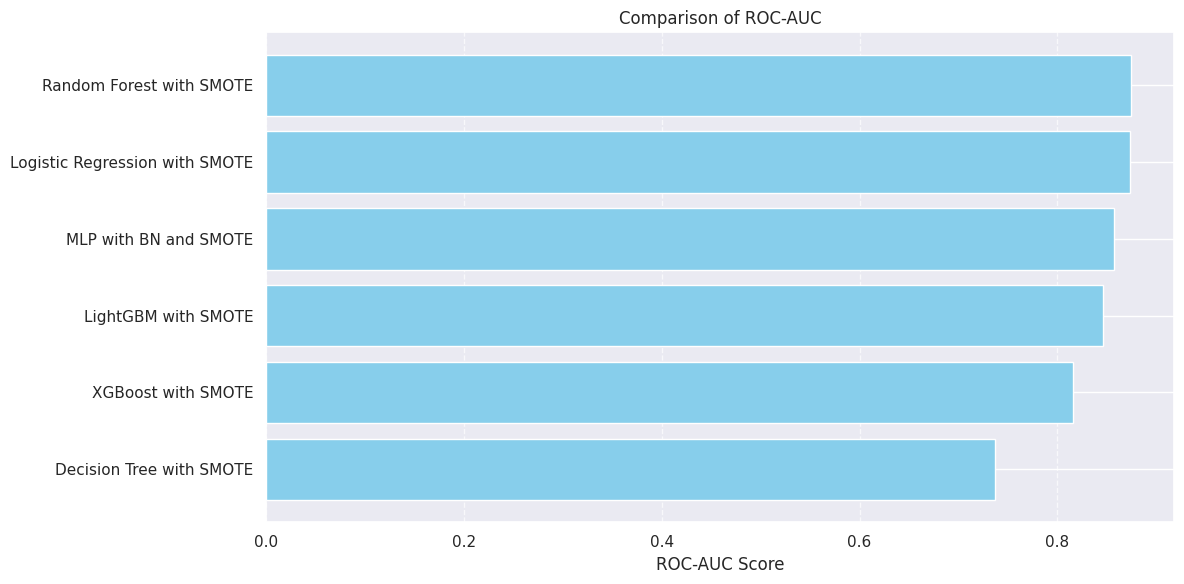

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest with SMOTE,0.805195,0.660377,0.744681,0.700000,0.874428
1,Logistic Regression with SMOTE,0.785714,0.625000,0.744681,0.679612,0.873136
2,MLP with BN and SMOTE,0.779221,0.644444,0.617021,0.630435,0.857427
3,LightGBM with SMOTE,0.805195,0.654545,0.765957,0.705882,0.846292
4,XGBoost with SMOTE,0.798701,0.637931,0.787234,0.704762,0.816465
5,Decision Tree with SMOTE,0.733766,0.546875,0.744681,0.630631,0.736826


In [106]:
# ROC-AUC 기준으로 정렬된 결과표 생성
results_with_smote = results_with_smote.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

# 막대그래프로 성능 비교 시각화
plt.figure(figsize=(12, 6))
plt.barh(results_with_smote["Model"], results_with_smote["ROC-AUC"], color='skyblue')
plt.xlabel("ROC-AUC Score")
plt.title("Comparison of ROC-AUC")
plt.gca().invert_yaxis()  # 가장 높은 값이 위로 오도록
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 결과표 함께 출력
results_with_smote


SMOTE 적용하고 안하고 차이 비교

In [107]:
combined_results = pd.concat([results, results_with_smote], ignore_index=True)
combined_results.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest with SMOTE,0.805195,0.660377,0.744681,0.700000,0.874428
1,Logistic Regression with SMOTE,0.785714,0.625000,0.744681,0.679612,0.873136
2,MLP with BN,0.798701,0.690476,0.617021,0.651685,0.868363
3,Logistic Regression,0.811688,0.736842,0.595745,0.658824,0.866574
4,Random Forest,0.818182,0.711111,0.680851,0.695652,0.860410
5,MLP with BN and SMOTE,0.779221,0.644444,0.617021,0.630435,0.857427
6,LightGBM with SMOTE,0.805195,0.654545,0.765957,0.705882,0.846292
7,LightGBM,0.805195,0.666667,0.723404,0.693878,0.842712
8,XGBoost,0.824675,0.708333,0.723404,0.715789,0.829191
9,XGBoost with SMOTE,0.798701,0.637931,0.787234,0.704762,0.816465


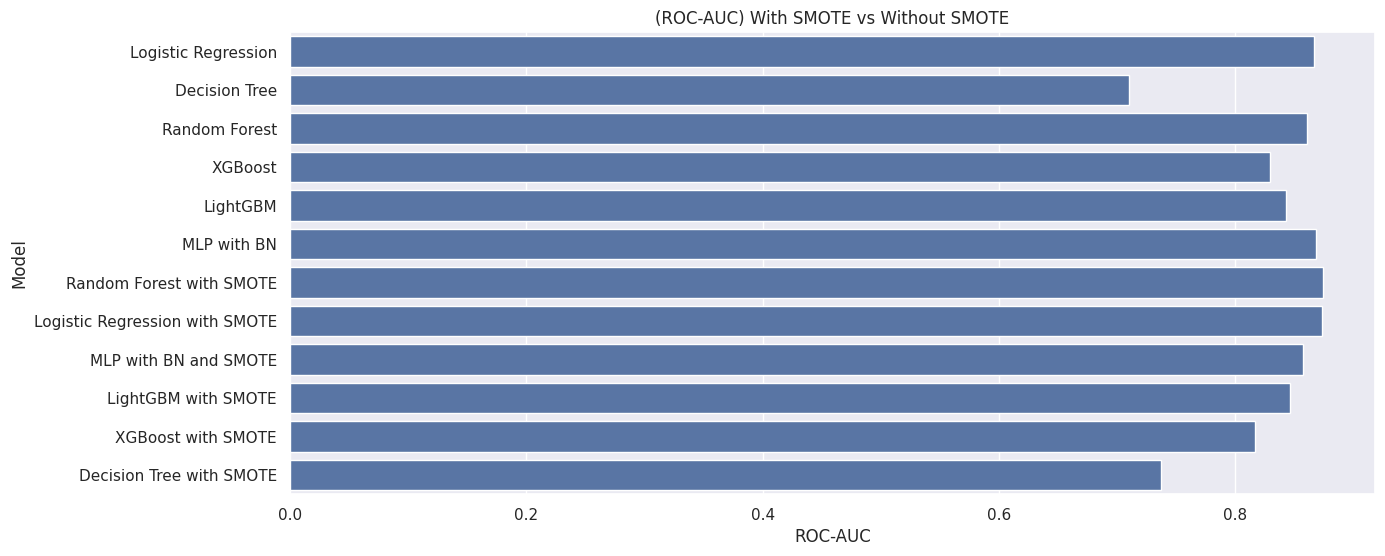

In [108]:
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.barplot(x="ROC-AUC", y="Model", data=combined_results)
plt.title("(ROC-AUC) With SMOTE vs Without SMOTE")
plt.grid(True, axis='x')
plt.show()


#### `Class Weight` 적용

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0) # random_state=42

In [127]:
# 딥러닝 MLP 모델 먼저 정의
import torch
import torch.nn as nn
import torch.nn.functional as F

class DiabetesMLP(nn.Module):
    def __init__(self, input_dim):
        super(DiabetesMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            # nn.Dropout(0.3), # dropout도 적용 가능하나 BN을 끄고 쓰는걸 추천! 되긴하는데 잘못쓰면 성능 떨어질 수 있음
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            # nn.Dropout(0.3),
            nn.Linear(32, 1),
            # nn.Sigmoid() # BCEWithLogitsLoss는 그 sigmoid 포함하고 있음
        )

    def forward(self, x):
        return self.model(x)

# 학습
def train_mlp(model, x_train, y_train, epochs=100, lr=1e-3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)


    # class 비율 계산
    pos_weight = torch.tensor([(y_train == 0).sum() / (y_train == 1).sum()], dtype=torch.float32)

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight.to(device))
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    X = torch.tensor(x_train, dtype=torch.float32).to(device)
    y = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32).to(device)

    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

# 평가 지표
def evaluate_mlp(model, x_test):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X = torch.tensor(x_test, dtype=torch.float32).to(device)
    with torch.no_grad():
        probs = model(X).cpu().numpy().flatten()
        preds = (probs > 0.5).astype(int)
    return preds, probs


In [128]:
# 모델 정의하기
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


models = {
    "Logistic Regression with CW": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree with CW": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest with CW": RandomForestClassifier(class_weight='balanced'),
    "XGBoost with CW": XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()),
    "LightGBM with CW": LGBMClassifier(verbose=-1, class_weight='balanced')  # 또는 is_unbalance=True
}


/home/icl/anaconda3/envs/ML/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [129]:
# 결과 저장 및 반복 학습 + 평가
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results_with_CW = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# sklearn 기반 모델들
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    results_with_CW = pd.concat([
        results_with_CW,
        pd.DataFrame([{
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba)
        }])
    ], ignore_index=True)

# MLP 추가
mlp_model = DiabetesMLP(input_dim=x_train.shape[1])
train_mlp(mlp_model, x_train, y_train, epochs=100)
mlp_preds, mlp_probs = evaluate_mlp(mlp_model, x_test)

results_with_CW = pd.concat([
    results_with_CW,
    pd.DataFrame([{
        "Model": "MLP with BN and CW",
        "Accuracy": accuracy_score(y_test, mlp_preds),
        "Precision": precision_score(y_test, mlp_preds),
        "Recall": recall_score(y_test, mlp_preds),
        "F1-Score": f1_score(y_test, mlp_preds),
        "ROC-AUC": roc_auc_score(y_test, mlp_probs)
    }])
], ignore_index=True)

/tmp/ipykernel_3631427/3089647554.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_with_CW = pd.concat([


In [130]:
# 최종 성능 비교표 출력
results_with_CW.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression with CW,0.759740,0.592593,0.680851,0.633663,0.869358
1,MLP with BN and CW,0.785714,0.659091,0.617021,0.637363,0.865977
2,Random Forest with CW,0.792208,0.674419,0.617021,0.644444,0.861006
3,LightGBM with CW,0.798701,0.642857,0.765957,0.699029,0.841320
4,XGBoost with CW,0.805195,0.654545,0.765957,0.705882,0.837343
5,Decision Tree with CW,0.772727,0.607143,0.723404,0.660194,0.758898


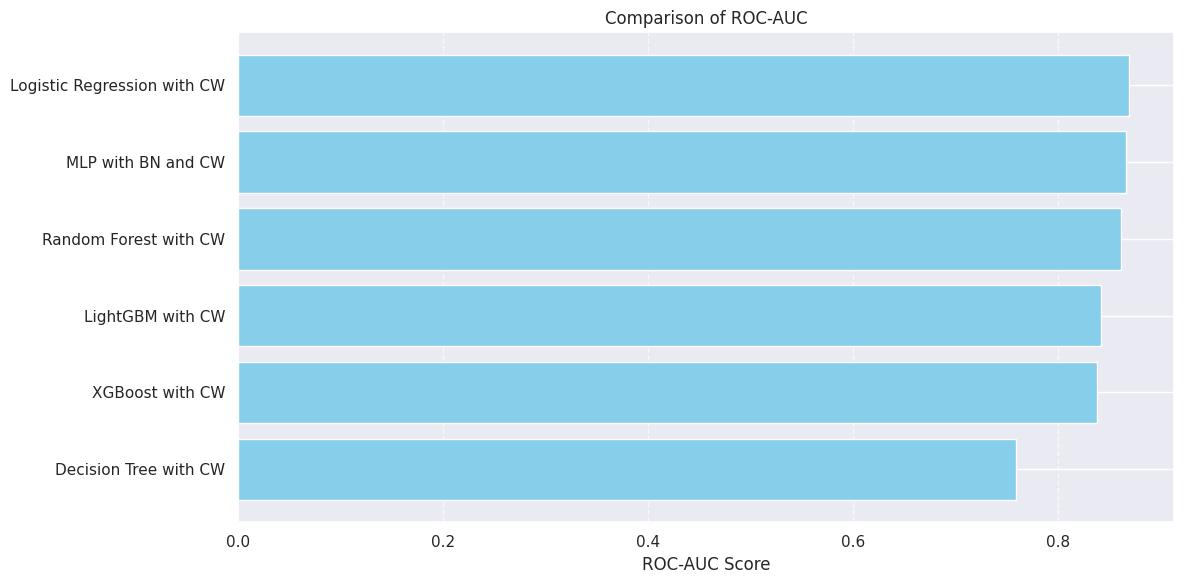

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression with CW,0.759740,0.592593,0.680851,0.633663,0.869358
1,MLP with BN and CW,0.785714,0.659091,0.617021,0.637363,0.865977
2,Random Forest with CW,0.792208,0.674419,0.617021,0.644444,0.861006
3,LightGBM with CW,0.798701,0.642857,0.765957,0.699029,0.841320
4,XGBoost with CW,0.805195,0.654545,0.765957,0.705882,0.837343
5,Decision Tree with CW,0.772727,0.607143,0.723404,0.660194,0.758898


In [131]:
# ROC-AUC 기준으로 정렬된 결과표 생성
results_with_CW = results_with_CW.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

# 막대그래프로 성능 비교 시각화
plt.figure(figsize=(12, 6))
plt.barh(results_with_CW["Model"], results_with_CW["ROC-AUC"], color='skyblue')
plt.xlabel("ROC-AUC Score")
plt.title("Comparison of ROC-AUC")
plt.gca().invert_yaxis()  # 가장 높은 값이 위로 오도록
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 결과표 함께 출력
results_with_CW


Class Weight 적용하고 안하고 차이 비교

In [132]:
combined_results_2 = pd.concat([results, results_with_CW], ignore_index=True)
combined_results_2.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression with CW,0.759740,0.592593,0.680851,0.633663,0.869358
1,MLP with BN,0.798701,0.690476,0.617021,0.651685,0.868363
2,Logistic Regression,0.811688,0.736842,0.595745,0.658824,0.866574
3,MLP with BN and CW,0.785714,0.659091,0.617021,0.637363,0.865977
4,Random Forest with CW,0.792208,0.674419,0.617021,0.644444,0.861006
5,Random Forest,0.818182,0.711111,0.680851,0.695652,0.860410
6,LightGBM,0.805195,0.666667,0.723404,0.693878,0.842712
7,LightGBM with CW,0.798701,0.642857,0.765957,0.699029,0.841320
8,XGBoost with CW,0.805195,0.654545,0.765957,0.705882,0.837343
9,XGBoost,0.824675,0.708333,0.723404,0.715789,0.829191


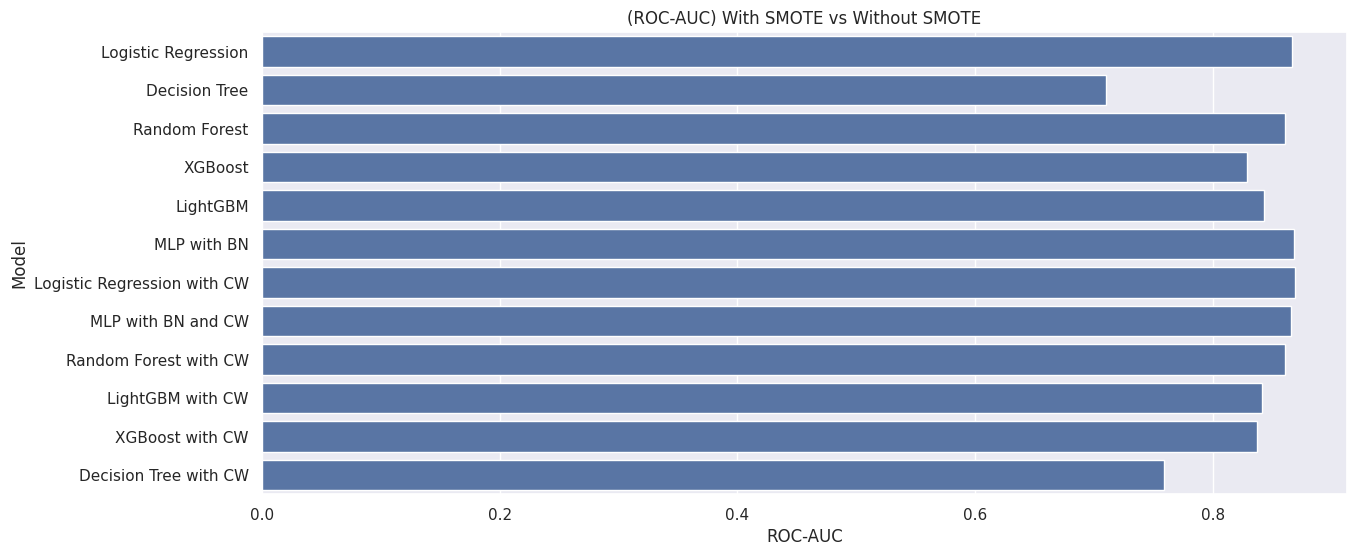

In [133]:
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.barplot(x="ROC-AUC", y="Model", data=combined_results_2)
plt.title("(ROC-AUC) With SMOTE vs Without SMOTE")
plt.grid(True, axis='x')
plt.show()


`SMOTE` vs `Class Weight`

In [134]:
combined_results_3 = pd.concat([results_with_smote, results_with_CW], ignore_index=True)
combined_results_3.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest with SMOTE,0.805195,0.660377,0.744681,0.700000,0.874428
1,Logistic Regression with SMOTE,0.785714,0.625000,0.744681,0.679612,0.873136
2,Logistic Regression with CW,0.759740,0.592593,0.680851,0.633663,0.869358
3,MLP with BN and CW,0.785714,0.659091,0.617021,0.637363,0.865977
4,Random Forest with CW,0.792208,0.674419,0.617021,0.644444,0.861006
5,MLP with BN and SMOTE,0.779221,0.644444,0.617021,0.630435,0.857427
6,LightGBM with SMOTE,0.805195,0.654545,0.765957,0.705882,0.846292
7,LightGBM with CW,0.798701,0.642857,0.765957,0.699029,0.841320
8,XGBoost with CW,0.805195,0.654545,0.765957,0.705882,0.837343
9,XGBoost with SMOTE,0.798701,0.637931,0.787234,0.704762,0.816465


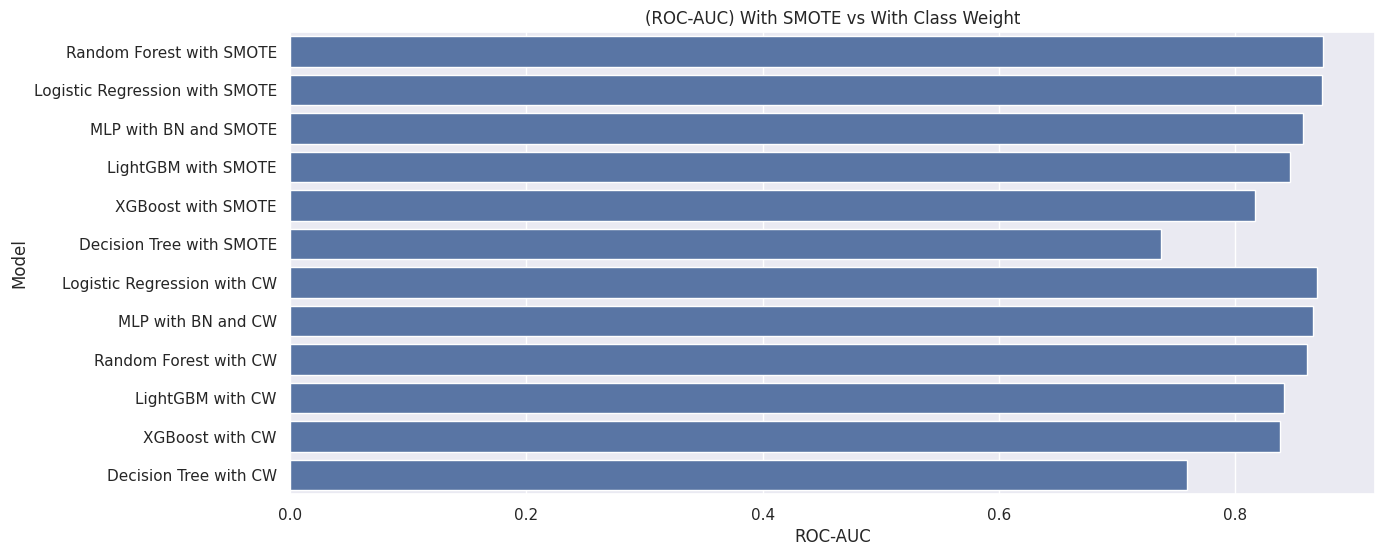

In [135]:
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.barplot(x="ROC-AUC", y="Model", data=combined_results_3)
plt.title("(ROC-AUC) With SMOTE vs With Class Weight")
plt.grid(True, axis='x')
plt.show()


`SMOTE`를 적용하 모델이 조금 더 좋은 성능을 보임